In [ ]:
from dataset import ImageDataset, load_dataset, scaling
from model import CNN, CNNWithNAL
import torch
from sklearn.metrics import accuracy_score
import pickle

torch.cuda.empty_cache()

# FashionMNIST0.3
## Load dataset

In [ ]:
training_data, training_labels, testing_data, testing_labels = load_dataset('datasets/FashionMNIST0.3.npz')

## Preprocessing

In [ ]:
T = torch.tensor([[0.7, 0.3, 0.0],
                  [0.0, 0.7, 0.3],
                  [0.3, 0.0, 0.7]], dtype=torch.float32)
train_dataset = ImageDataset(training_data, training_labels, transition_matrix=T)
test_dataset = ImageDataset(testing_data, testing_labels)

## CNN Training

In [ ]:
import os
if not os.path.exists('results/cnn_fashionmnist0.3_pred_results.pkl'):
    prediction_results = []
    accuracy_results = []
    for round in range(10):
        print(f"----------Training CNN round {round+1}/10----------")
        cnn = CNN(num_classes=3, dataset_name="FashionMNIST0.3")
        cnn.train(train_dataset)
        y_true, y_pred = cnn.predict(test_dataset)
        prediction_results.append((y_true, y_pred))
        accuracy = accuracy_score(y_true, y_pred)
        accuracy_results.append(accuracy)
        print(f"CNN Test Acc: {accuracy*100:.2f}%")

    with open('results/cnn_fashionmnist0.3_pred_results.pkl', 'wb') as f:
        pickle.dump(prediction_results, f)

    with open('results/cnn_fashionmnist0.3_acc_results.pkl', 'wb') as f:
        pickle.dump(accuracy_results, f)


----------Training CNN round 1/10----------
Epoch [1/100], Training Loss: 0.6506, Validation Loss: 0.6495, Validation Accuracy: 67.72%
Epoch [2/100], Training Loss: 0.6283, Validation Loss: 0.6333, Validation Accuracy: 68.11%
Epoch [3/100], Training Loss: 0.6224, Validation Loss: 0.6360, Validation Accuracy: 67.94%
Epoch [4/100], Training Loss: 0.6208, Validation Loss: 0.6748, Validation Accuracy: 65.53%
Epoch [5/100], Training Loss: 0.6207, Validation Loss: 0.6438, Validation Accuracy: 67.86%
Epoch [6/100], Training Loss: 0.6204, Validation Loss: 0.7349, Validation Accuracy: 66.11%
Epoch [7/100], Training Loss: 0.6190, Validation Loss: 0.6364, Validation Accuracy: 68.25%
Epoch [8/100], Training Loss: 0.6153, Validation Loss: 0.6379, Validation Accuracy: 67.94%
Epoch [9/100], Training Loss: 0.6165, Validation Loss: 0.6424, Validation Accuracy: 68.22%
Epoch [10/100], Training Loss: 0.6140, Validation Loss: 0.6337, Validation Accuracy: 68.14%
Epoch [11/100], Training Loss: 0.6145, Valida

## CNN with Noise Adaption Layer Training

In [ ]:
if not os.path.exists('results/cnnwithnal_fashionmnist0.3_pred_results.pkl'):
    prediction_results = []
    accuracy_results = []
    for round in range(10):
        print(f"----------Training CNN round {round+1}/10----------")
        cnn = CNNWithNAL(num_classes=3, dataset_name="FashionMNIST0.3")
        cnn.train(train_dataset)
        y_true, y_pred = cnn.predict(test_dataset)
        prediction_results.append((y_true, y_pred))
        accuracy = accuracy_score(y_true, y_pred)
        accuracy_results.append(accuracy)
        print(f"CNN Test Acc: {accuracy*100:.2f}%")

    with open('results/cnnwithnal_fashionmnist0.3_pred_results.pkl', 'wb') as f:
        pickle.dump(prediction_results, f)

    with open('results/cnnwithnal_fashionmnist0.3_acc_results.pkl', 'wb') as f:
        pickle.dump(accuracy_results, f)


# Visualisation

C:\Users\brian\AppData\Local\Temp\ipykernel_23364\4258827235.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[0].boxplot([cnn_acc_03, cnnwithnal_acc_03], labels=models)


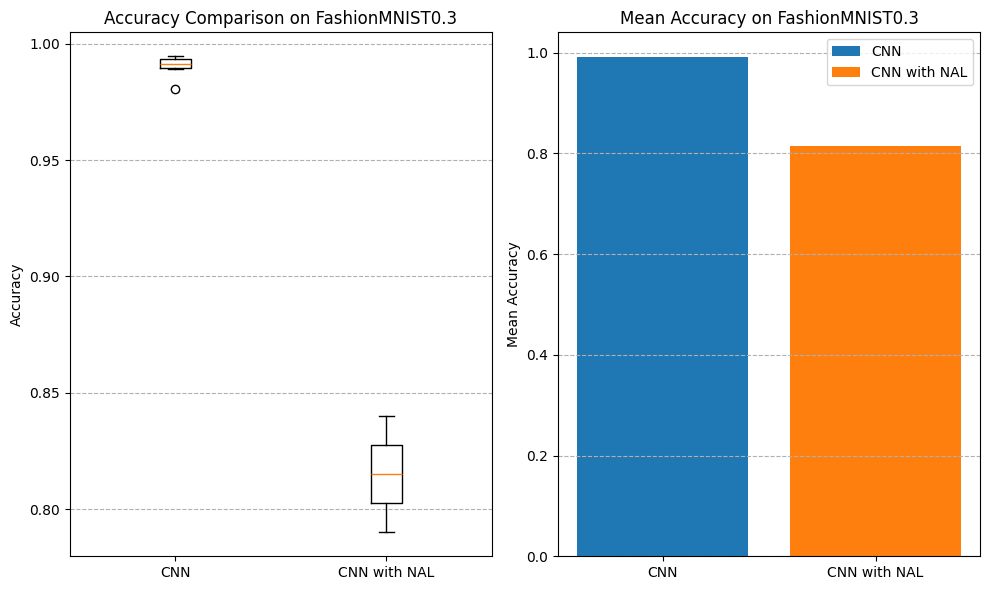

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

with open('results/cnn_fashionmnist0.3_acc_results.pkl', 'rb') as f:
    cnn_acc_03 = pickle.load(f)

with open('results/cnnwithnal_fashionmnist0.3_acc_results.pkl', 'rb') as f:
    cnnwithnal_acc_03 = pickle.load(f)

models   = ['CNN', "CNN with NAL"]

fig, axs = plt.subplots(1, 2, figsize=(10, 6))
axs[0].boxplot([cnn_acc_03, cnnwithnal_acc_03], labels=models)
axs[0].set_title('Accuracy Comparison on FashionMNIST0.3')
axs[0].set_ylabel('Accuracy')
axs[0].grid(axis='y', linestyle='--')
axs[1].bar(models, [np.mean(cnn_acc_03), np.mean(cnnwithnal_acc_03)], label=models, color=['tab:blue', 'tab:orange'])
axs[1].set_title('Mean Accuracy on FashionMNIST0.3')
axs[1].set_ylabel('Mean Accuracy')
axs[1].grid(axis='y', linestyle='--')
plt.legend(models)
plt.tight_layout()
plt.show()


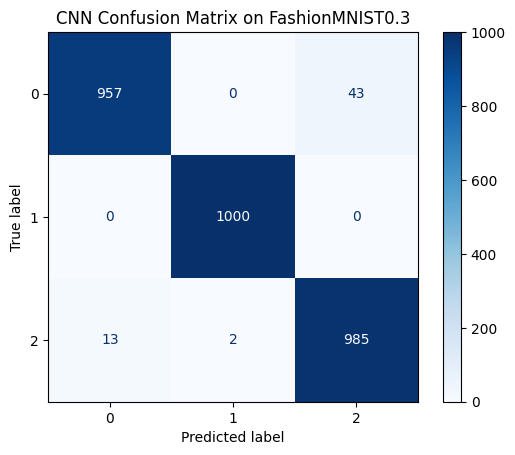

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
with open('results/cnn_fashionmnist0.3_pred_results.pkl', 'rb') as f:
    cnn_pred_results_03 = pickle.load(f)
y_true = cnn_pred_results_03[0][0]
y_pred = cnn_pred_results_03[0][1]
cm = confusion_matrix(y_true, y_pred)
confusion_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2])
confusion_disp.plot(cmap=plt.cm.Blues)
plt.title('CNN Confusion Matrix on FashionMNIST0.3')
plt.show()